In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
wd = "~/Dropbox/Work/Petter Bjornstad/Pima/Master data/Raw data/"
# wd = "path/to/Laura's/folder"

# Vital Status

In [2]:
# Import
vital_status = pd.read_csv(wd+'NelsonVitalStatusDEC_DATA_2021-02-04_1616.csv')
# Delete empty rows
vital_status = vital_status[vital_status['end_stage_renal_disease_form_complete']!=0]
# Collapse rows - get first non-NA element in each column by record ID
vital_status = vital_status.groupby('record_id',as_index=False).first()
# Get columns of interest - ask Rob and Helen for a list of these
vital_status = vital_status[['esrd_start_date','dod']]

# GFR

In [3]:
def get_gfr(df):
    # Convert record id to categorical 
    df['record_id'] = df['record_id'].astype("category")
    # Index by id and redcap event
    df = df.set_index(['record_id','redcap_event_name'])
    # Find GFR and date columns
    gfr_cols = [col for col in df.columns if col in ['gfr','s_gfr']]
    date_cols = [col for col in df.columns if 'visitdate' in col and "_" not in col]
    # Get all dates
    for d in range(len(date_cols)-1):
        df[date_cols[0]] = df[date_cols[0]].fillna(df[date_cols[d]])
    gfr = df[[date_cols[0]]+gfr_cols]
    # Get all 
    # Drop completely missing rows and columns
    df = gfr.dropna(axis=0,subset=gfr_cols,how='all').dropna(axis=1,how='all')
    # Reindex by name and date
    df.reset_index(level=1,drop=True,inplace=True)
    df.rename(columns={df.columns[0]:'date'},inplace=True)
    df.set_index('date',append=True,inplace=True)
    # Done
    return(df)
def gfr_lineplot(df,ax):
    # Sort by id then date
    df.sort_index(inplace=True)
    # Visit number from date
    df['visit_num'] = df.groupby('record_id').cumcount()+1
    df.reset_index(inplace=True)
    return(sns.lineplot(x="visit_num", y="gfr",hue="record_id",ax=ax,data=df).get_legend().remove())
def gfr_boxplot(df,ax):
    df.sort_index(inplace=True)
    # Visit number from date
    df['visit_num'] = df.groupby('record_id').cumcount()+1
    df.reset_index(inplace=True)
    return(sns.boxplot(x='record_id',y="gfr",ax=ax,data=df))

## Group 4

<AxesSubplot:xlabel='record_id', ylabel='gfr'>

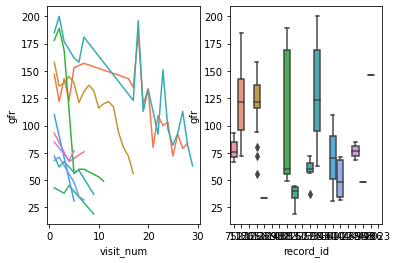

In [4]:
group4 = pd.read_csv(wd+'Group4UofMRemodel112_DATA_2021-02-04_1617.csv',low_memory=False).dropna(axis=1,how='all')
g = get_gfr(group4)
# Plot
fig, ax =plt.subplots(1,2)
gfr_lineplot(g,ax=ax[0])
gfr_boxplot(g,ax=ax[1])

## Ficoll

<AxesSubplot:xlabel='record_id', ylabel='gfr'>

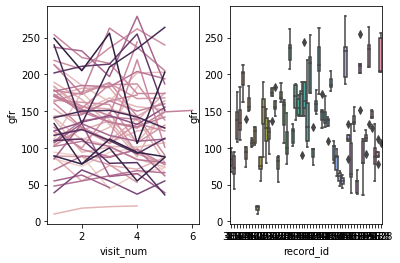

In [5]:
ficoll = pd.read_csv(wd+'FicollUniversityOfMi_DATA_2021-02-04_1618.csv',low_memory=False).dropna(axis=1,how='all')
# Plot
fig, ax =plt.subplots(1,2)
gfr_lineplot(ficoll,ax=ax[0])
gfr_boxplot(ficoll,ax=ax[1])

## DDN

<AxesSubplot:xlabel='record_id', ylabel='gfr'>

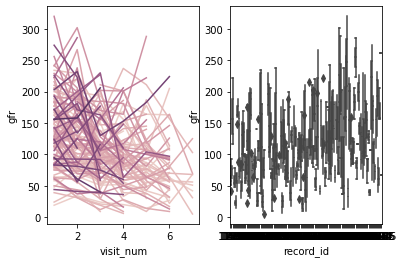

In [7]:
ddn = pd.read_csv(wd+'Nelson13DKN151Determ_DATA_2021-02-04_1610.csv',low_memory=False).dropna(axis=1,how='all')
# Plot
fig, ax =plt.subplots(1,2)
gfr_lineplot(ddn,ax=ax[0])
gfr_boxplot(ddn,ax=ax[1])